In [1]:
from src.models import TemporalPC

In [2]:
from torchvision import transforms, io
from torch import mean, stack, Size, std, cuda
from PIL import Image

In [57]:
bar_img = Image.open("/Users/janthiel/Documents/Rotating_Snake copy 2.jpg")

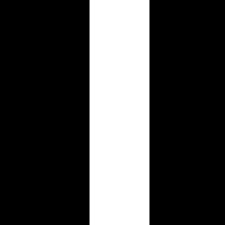

In [58]:
bar_img 

In [40]:
convert_tensor = transforms.ToTensor()

In [59]:
tensor_1 = convert_tensor(bar_img)

In [60]:
flat = tensor_1.view(151875)

In [43]:
transform = transforms.ToPILImage()

In [44]:
model = TemporalPC(151875,1000,151875)

In [45]:
bsz = 1  # batch size
prev_z = model.init_hidden(bsz)

In [53]:
for i in range(50):
    model.inference(inf_iters=1, inf_lr=0.1, x=flat, u=flat, prev_z=prev_z, update_x=False)
    prev_z = model.z

In [54]:
pred_z, pred_x = model.forward(prev_z = prev_z, u = flat)

In [55]:
output_image = pred_x.view(3, 225, 225)

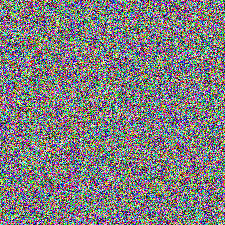

In [56]:
transform(output_image)